In [1]:
import gymnasium as gym
from gymnasium import spaces
import json
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scheduler_env.figure_env import SchedulingEnv

In [3]:
import warnings
# 특정 경고를 무시하도록 필터를 설정합니다.
warnings.filterwarnings("ignore", category=Warning)

In [4]:
env = SchedulingEnv(machine_config_path= "instances/Machines/v0-2.json", job_config_path = "instances/figure/job3.json", job_repeats_params = [(2, 1)] * 3, test_mode=True)

In [5]:
env.show_job_info()

,Job Name,Mean Ops Duration,Std Ops Duration,# of Ops,Mean Deadline,Std Deadline,Repeats
0,Job 1,2.000000,0.816497,3,0.00,0.000000,2
1,Job 2,1.666667,0.471405,3,0.00,0.000000,2
2,Job 3,1.000000,0.000000,3,0.00,0.000000,2


In [6]:
env.show_env_info()

,Operation Type,Total Count,Avg Duration,Std Duration,Machine Count
0,A,10,1.60,0.80,2
1,B,8,1.50,0.50,1


Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 1 - Repeat 2 : ETD = 2.19, D = 12
Job 2 - Repeat 1 : ETD = 0.18400000000000002, D = 8
Job 2 - Repeat 2 : ETD = 0.17800000000000002, D = 11
Job 3 - Repeat 1 : ETD = 0.8133333333333332, D = 6
Job 3 - Repeat 2 : ETD = 0.8, D = 10
finish_time 300


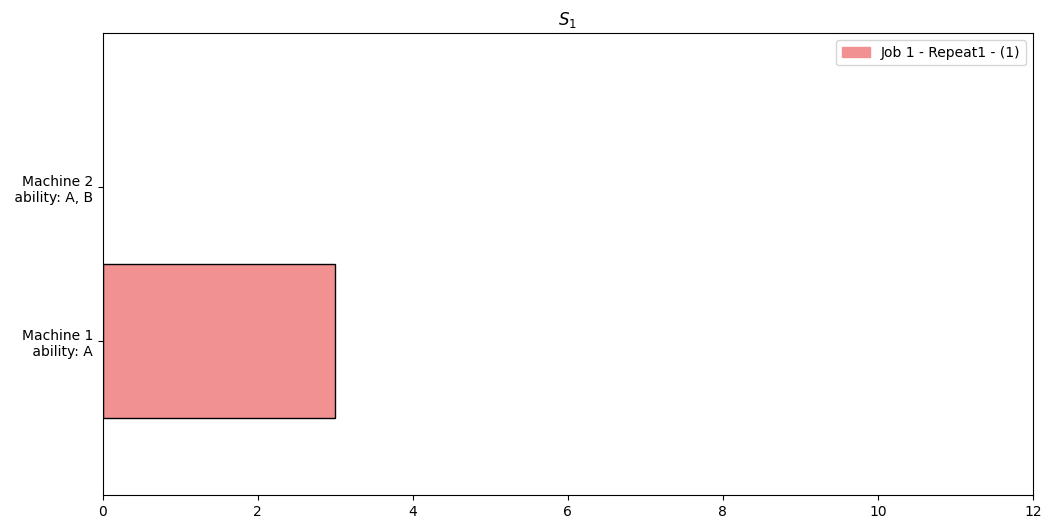

Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 1 - Repeat 2 : ETD = 2.44, D = 12
Job 2 - Repeat 1 : ETD = 2.352, D = 8
Job 2 - Repeat 2 : ETD = 0.37800000000000006, D = 11
Job 3 - Repeat 1 : ETD = 0.98, D = 6
Job 3 - Repeat 2 : ETD = 0.9666666666666666, D = 10
finish_time 300


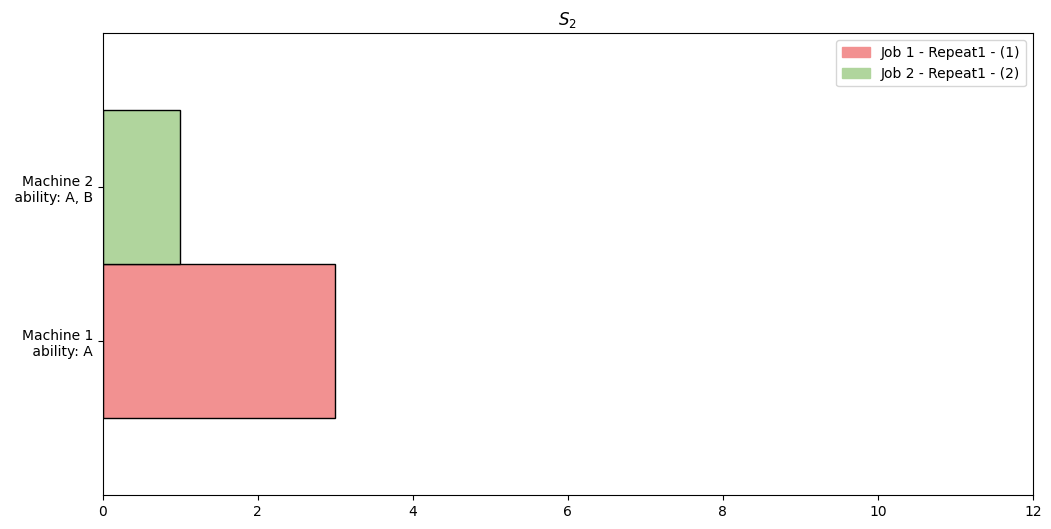

Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 1 - Repeat 2 : ETD = 2.94, D = 12
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 2 - Repeat 2 : ETD = 0.37800000000000006, D = 11
Job 3 - Repeat 1 : ETD = 1.3133333333333332, D = 6
Job 3 - Repeat 2 : ETD = 1.3, D = 10
finish_time 500


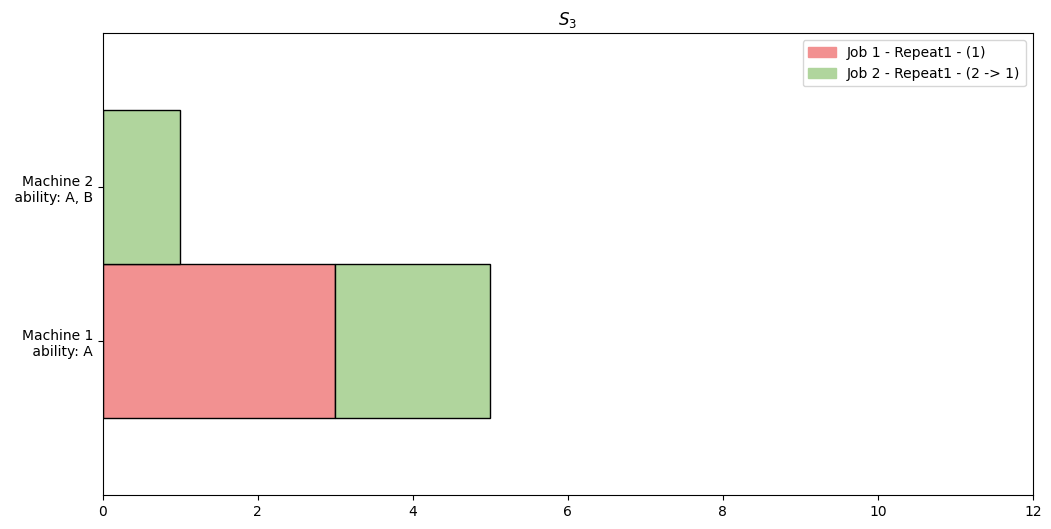

Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 1 - Repeat 2 : ETD = 2.94, D = 12
Job 2 - Repeat 2 : ETD = 0.37800000000000006, D = 11
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 3 - Repeat 1 : ETD = 1.3133333333333332, D = 6
Job 3 - Repeat 2 : ETD = 1.3, D = 10
finish_time 700


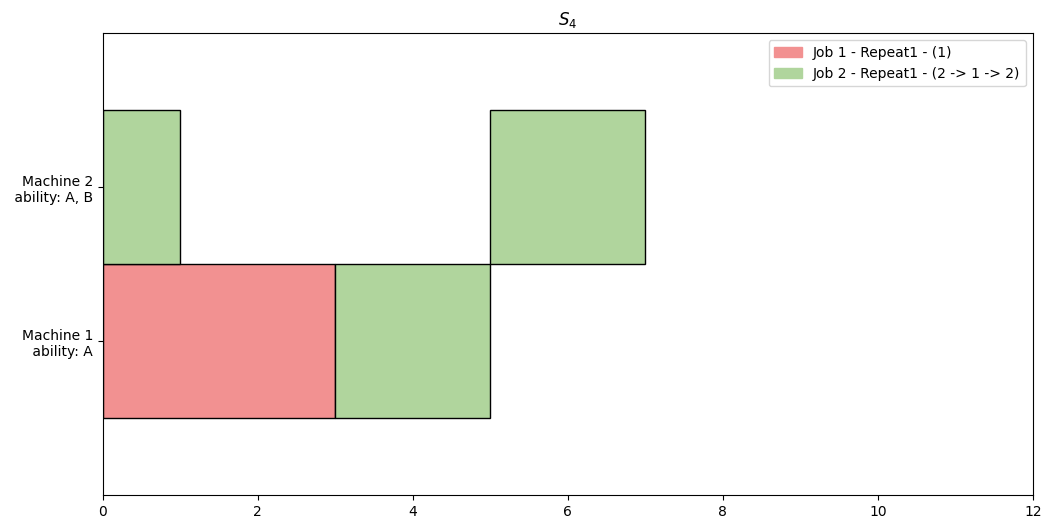

Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 1 - Repeat 2 : ETD = 3.19, D = 12
Job 2 - Repeat 2 : ETD = 3.234, D = 11
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 3 - Repeat 1 : ETD = 1.48, D = 6
Job 3 - Repeat 2 : ETD = 1.4666666666666666, D = 10
finish_time 700


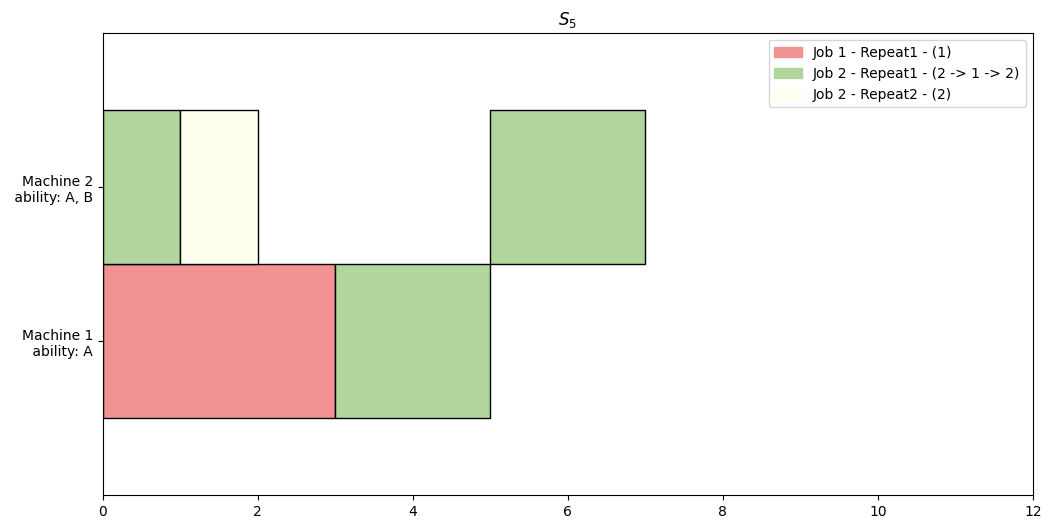

Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 1 - Repeat 2 : ETD = 3.69, D = 12
Job 2 - Repeat 2 : ETD = 8.89, D = 11
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 3 - Repeat 1 : ETD = 1.8133333333333332, D = 6
Job 3 - Repeat 2 : ETD = 1.8, D = 10
finish_time 700


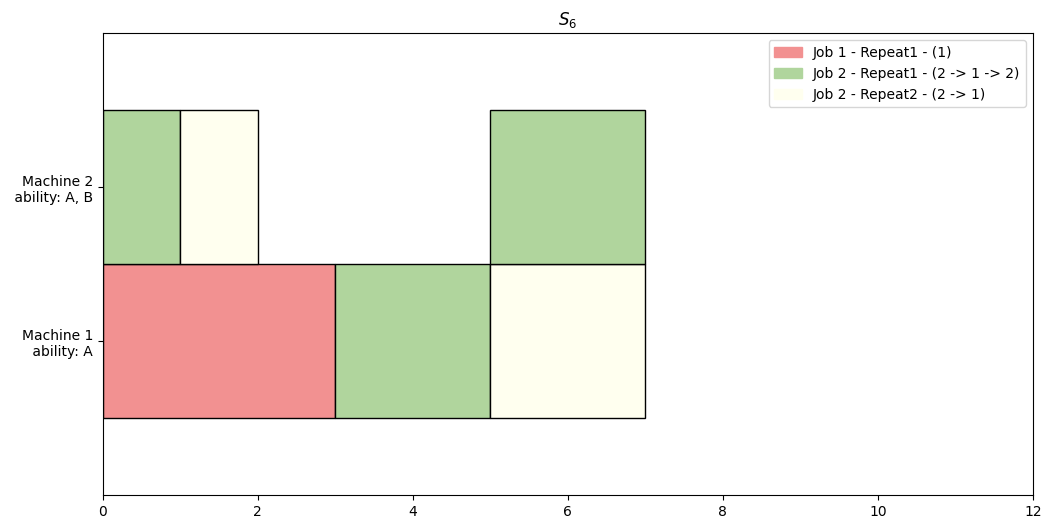

Job 1 - Repeat 2 : ETD = 4.94, D = 12
Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 2 - Repeat 2 : ETD = 8.89, D = 11
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 3 - Repeat 1 : ETD = 2.6266666666666665, D = 6
Job 3 - Repeat 2 : ETD = 1.9666666666666666, D = 10
finish_time 700


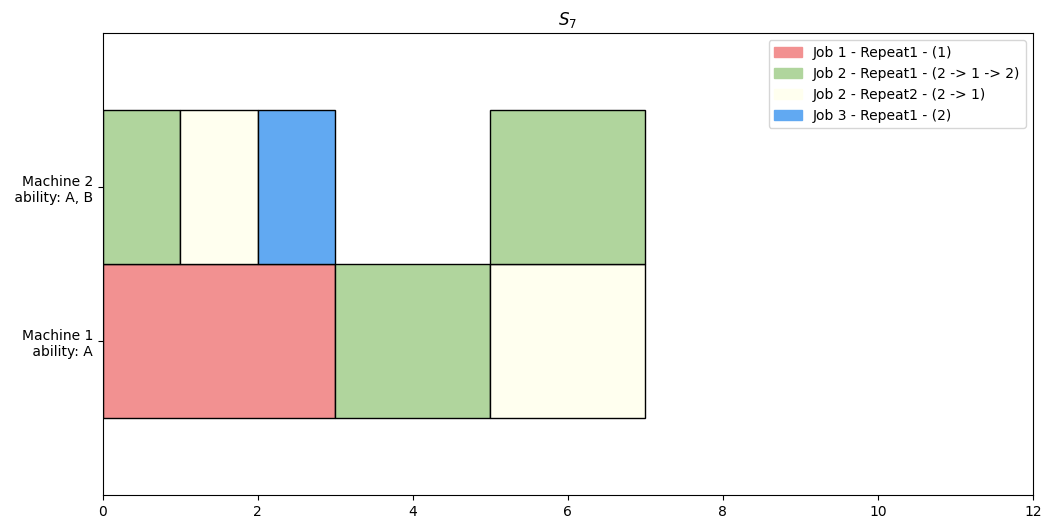

Job 1 - Repeat 2 : ETD = 4.94, D = 12
Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 2 - Repeat 2 : ETD = 8.89, D = 11
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 3 - Repeat 1 : ETD = 2.6266666666666665, D = 6
Job 3 - Repeat 2 : ETD = 1.9666666666666666, D = 10
finish_time 700


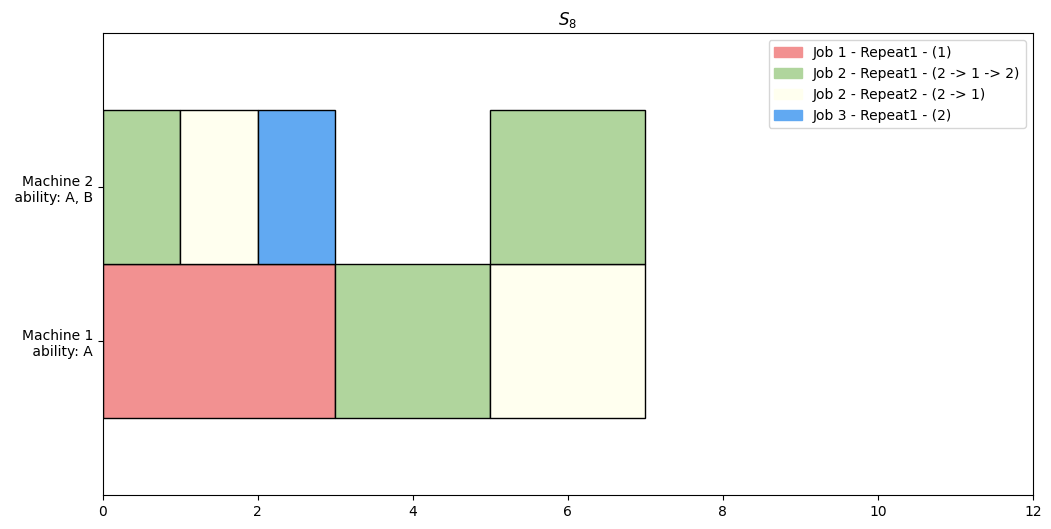

Job 1 - Repeat 2 : ETD = 9.9, D = 12
Job 1 - Repeat 1 : ETD = 4.091666666666667, D = 9
Job 2 - Repeat 2 : ETD = 8.89, D = 11
Job 2 - Repeat 1 : ETD = 6.92, D = 8
Job 3 - Repeat 1 : ETD = 2.6266666666666665, D = 6
Job 3 - Repeat 2 : ETD = 2.466666666666667, D = 10
finish_time 1000


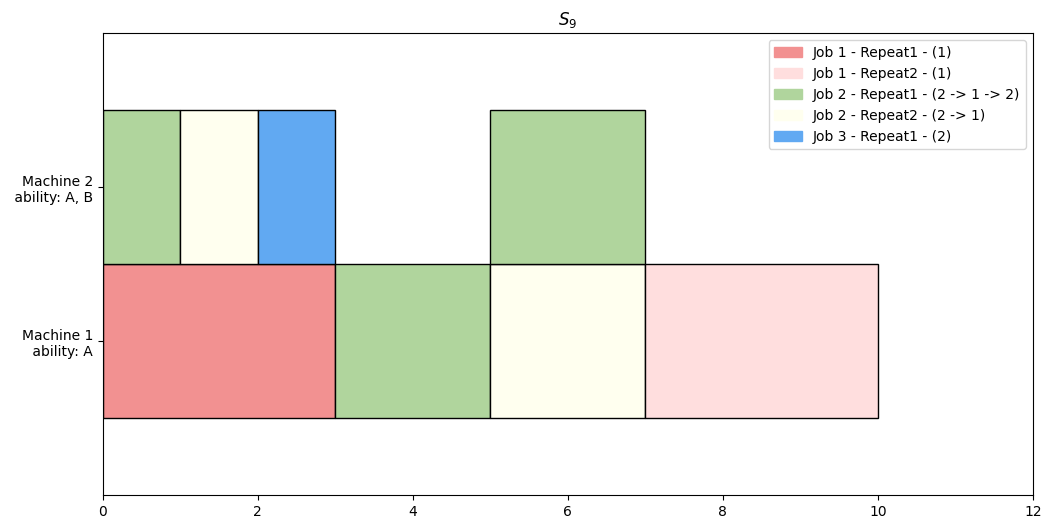

IndexError: list index out of range

In [7]:
step = 0
obs, info = env.reset()
#print(info['schedule_buffer'])

# actions = [(2, 2), (3, 1), (2, 1), (1, 1), (1, 2), (3, 1), (3, 2)]
actions = [(1, 1), (2, 2), (2, 1), (2, 2), (2, 2), (2, 1), (3, 2), (2, 1), (1, 1)]
J = 3
M = 2

while True:
    action = actions[step]
    action = (action[0] - 1) + (action[1] - 1) * J
    # action = env.action_space.sample()
    # print(action)
    
    step += 1
    obs, reward, terminated, truncated, info = env.step(action)
    # print(f"action : {action // 3}, {action % 3}")
    # print(info['schedule_buffer'])
    # env.visualize_graph()
    done = terminated or truncated
    et = list(map(lambda x: x / 100, info['job_estimated_tardiness']))
    # print(f'Job 1 ET : {et[0], et[1]}')
    # print(f'Job 2 ET : {et[2], et[3]}')
    # print(f'Job 3 ET : {et[4], et[5]}')
    # print('job_deadline', info['job_deadline'])
    # print(f'Action mask : {info["action_mask"]}')
    for job_list in info['jobs']:
        for job in job_list:
            print(f'{job.name} - Repeat {job.index + 1} : ETD = {job.estimated_tardiness / 100}, D = {job.deadline}')
    print('finish_time', info['finish_time'])
    
    env.render()
    
    
    if done:
        print("Goal reached!", "final score=", reward)
        print('finish_time', info['finish_time'])
        print('machine_operation_rate', info['machine_operation_rate'])
        print('job_deadline', info['job_deadline'])
        print('job_time_exceeded', info['job_time_exceeded'])
        print('current_repeats', info['current_repeats'])
        print(env.target_time)
        break